# House Prices
In this project we will predict the house prices using the Regularization Techniques **Lasso**, **Ridge** and **Linear** models.

## 1. Importing and cleaning the data

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns
import collections
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

Let's read the training and testing data.

In [2]:
train = pd.read_csv("D:/Maestría/AI/Proyecto 1/train.csv")
test = pd.read_csv("D:/Maestría/AI/Proyecto 1/test.csv")

In [3]:
display(train.head(),test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Check the information of the data. The target that we want to predict is the Sale Price. Note that some features are of object type.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

The instructions below, exclude those columns of object type and the 'SalePrice' column. In the test data we have not this column.

In [6]:
indexobj_train = train.columns[train.dtypes == "object"]
indexobj_test = test.columns[test.dtypes == "object"]

In [7]:
xtrain = train.drop(indexobj_train, axis = 1).drop('SalePrice', axis = 1)
xtest = test.drop(indexobj_test, axis = 1)

Before to see the correlation matrix, we will impute the missing values with the mean of the non-missing values of their respective columns. Note that from the training information, there aren't missing values.

In [8]:
xtrain = xtrain.fillna(train.mean())
xtest = xtest.fillna(test.mean())

Let's check the new tables.

In [9]:
display(xtrain.head(),xtest.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


# 2. Using Regularization Techniques

See the correlation matrix of the remaining columns.

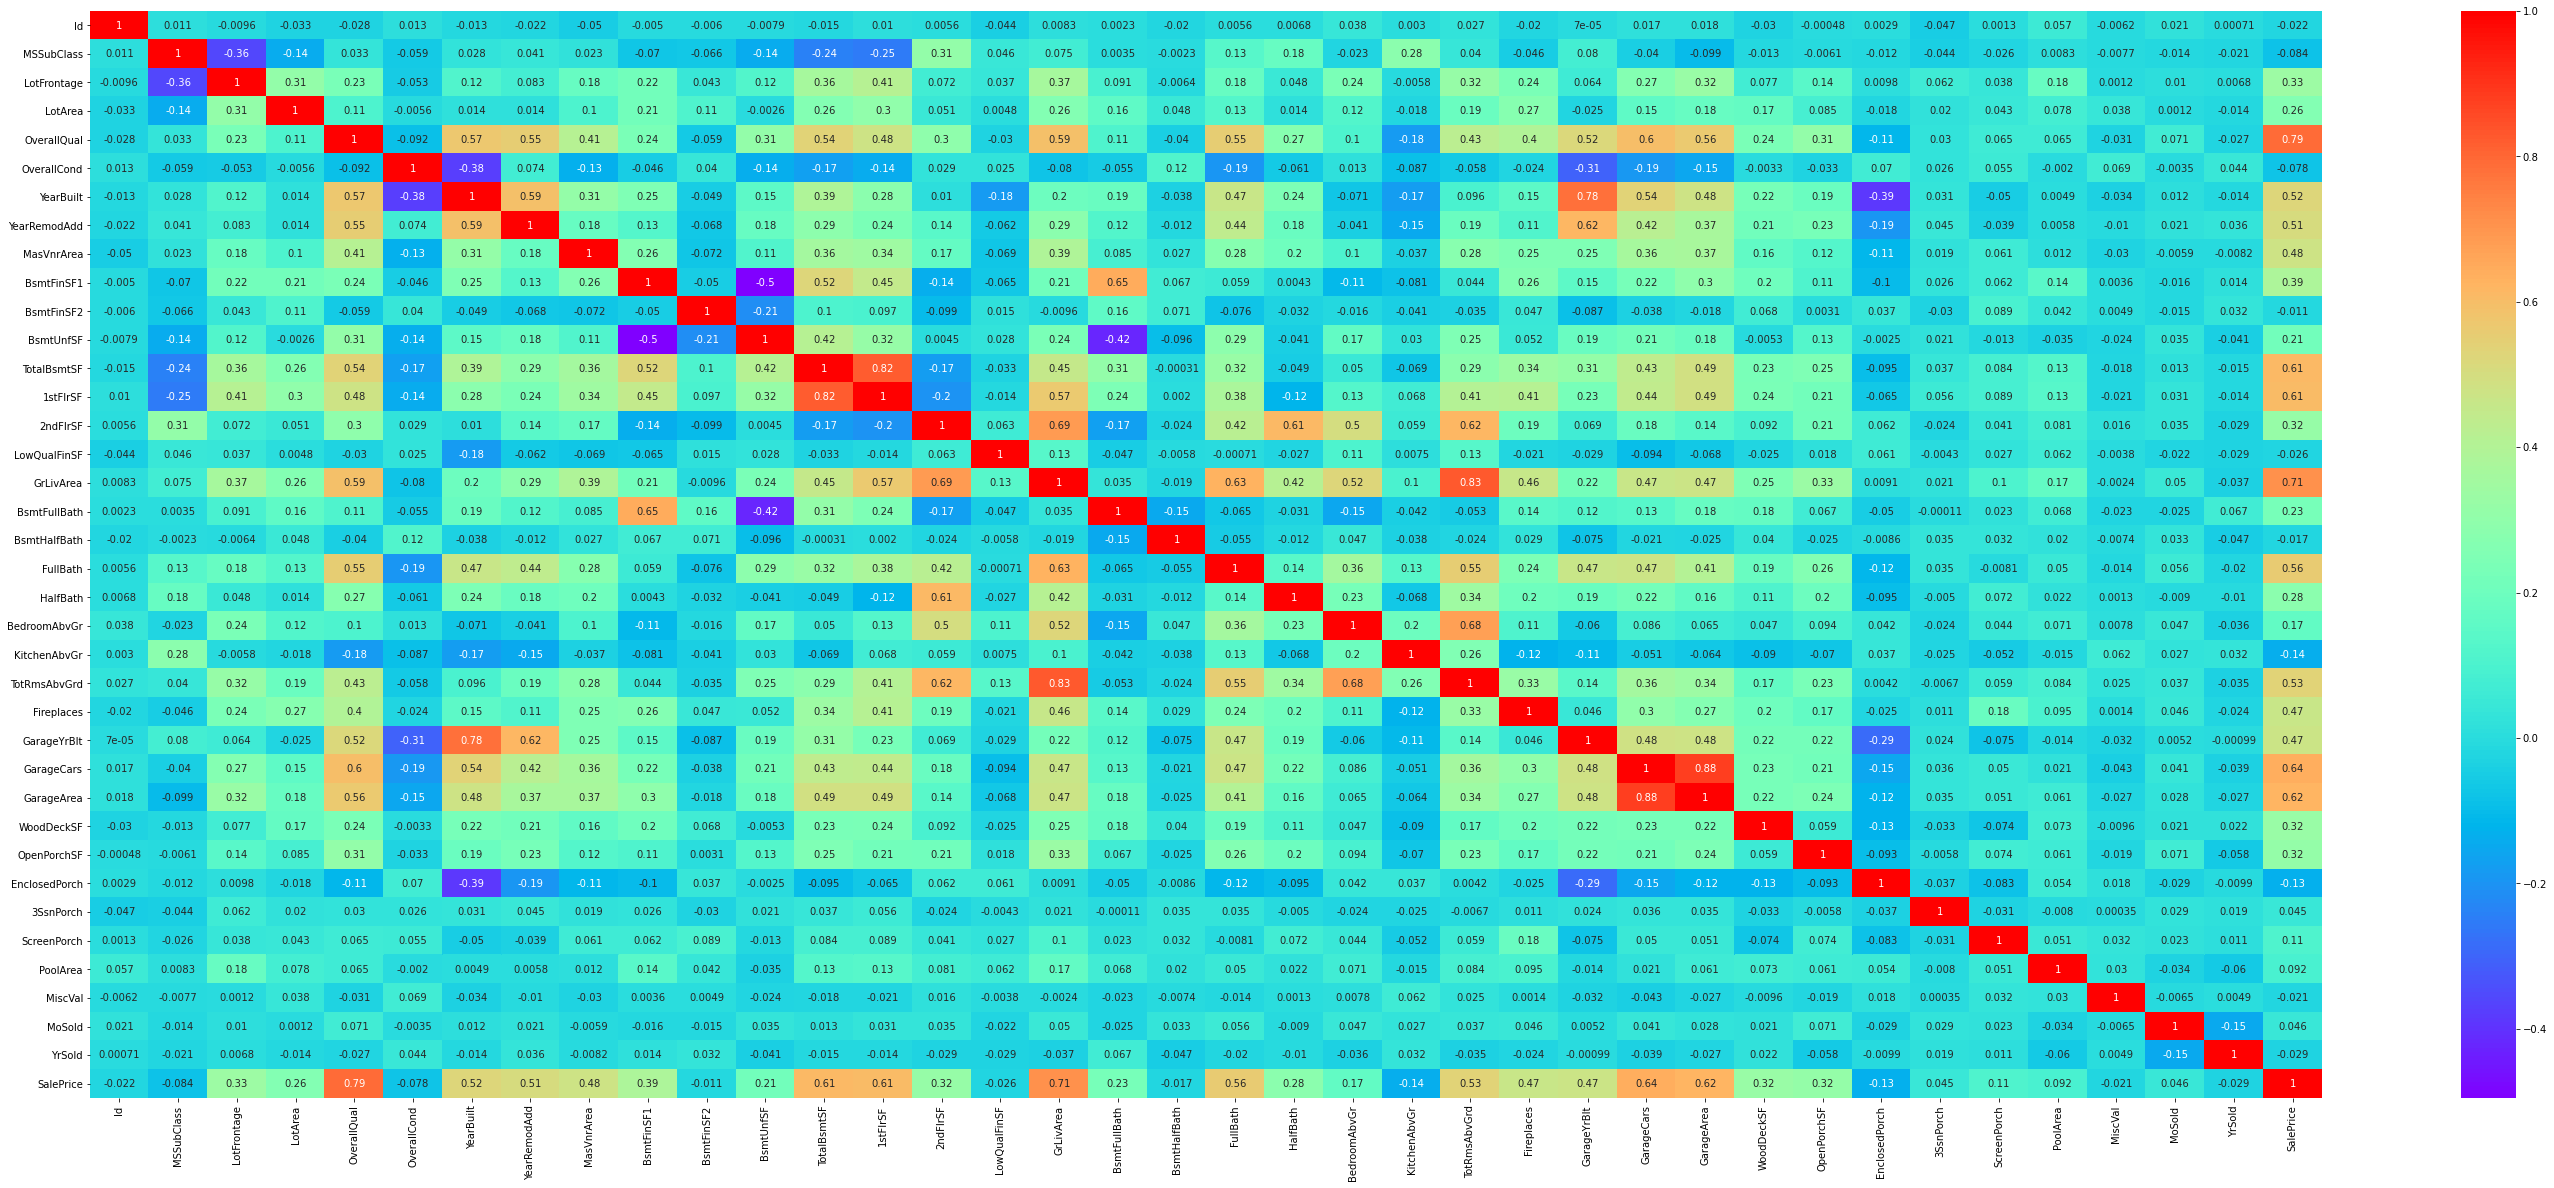

In [10]:
ytrain = train[['SalePrice']]
corr_mat = pd.concat((xtrain, ytrain),axis=1).corr()

plt.figure(figsize = (50, 20))
sns.heatmap(corr_mat, annot = True, cmap="rainbow")
plt.show()

In particular, observe the more correlated features with the Sale Price feature.

In [11]:
corr_mat['SalePrice'].abs().sort_values(ascending=False)[:6]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

**********

### 2.1 Lasso Model.
Now we use Lasso Regression to obtain the respective coefficients and then testing the model.

In [12]:
lasso_model = Lasso(alpha=0.5,normalize=False, max_iter=1e6)
lasso_model.fit(xtrain,ytrain)
lasso_model.coef_

array([-1.07763319e+00, -1.81227234e+02, -5.66207156e+01,  4.28348072e-01,
        1.73010187e+04,  4.67987815e+03,  2.71404903e+02,  1.35028844e+02,
        3.12987576e+01,  1.56435834e+01,  4.69415435e+00,  5.74903094e+00,
        3.51745410e+00,  4.37298384e+01,  4.36326521e+01,  1.97030770e+01,
        5.32724217e+00,  9.36476426e+03,  1.99320265e+03,  3.45520020e+03,
       -1.86995656e+03, -1.00779262e+04, -1.23157837e+04,  5.07982534e+03,
        3.94746067e+03,  1.22147656e+02,  1.12578966e+04, -4.18755599e+00,
        2.38743663e+01, -2.90782574e+00,  1.17924969e+01,  1.97540329e+01,
        5.59679182e+01, -2.83387917e+01, -7.36957529e-01, -4.51458795e+01,
       -7.76215975e+02])

See the first ten predictions of the test data.

In [13]:
lasso_model.predict(xtest)[:10]

array([115936.67114683, 151035.00668993, 171990.22766573, 198522.52879085,
       194968.14079063, 181129.92985968, 198664.14098961, 171001.24084641,
       206148.52627933, 112759.63299298])

From the correlation matrix, choose first five more correlated the features with Sale Price in order to compare the results of the predicts and the supervised training data.

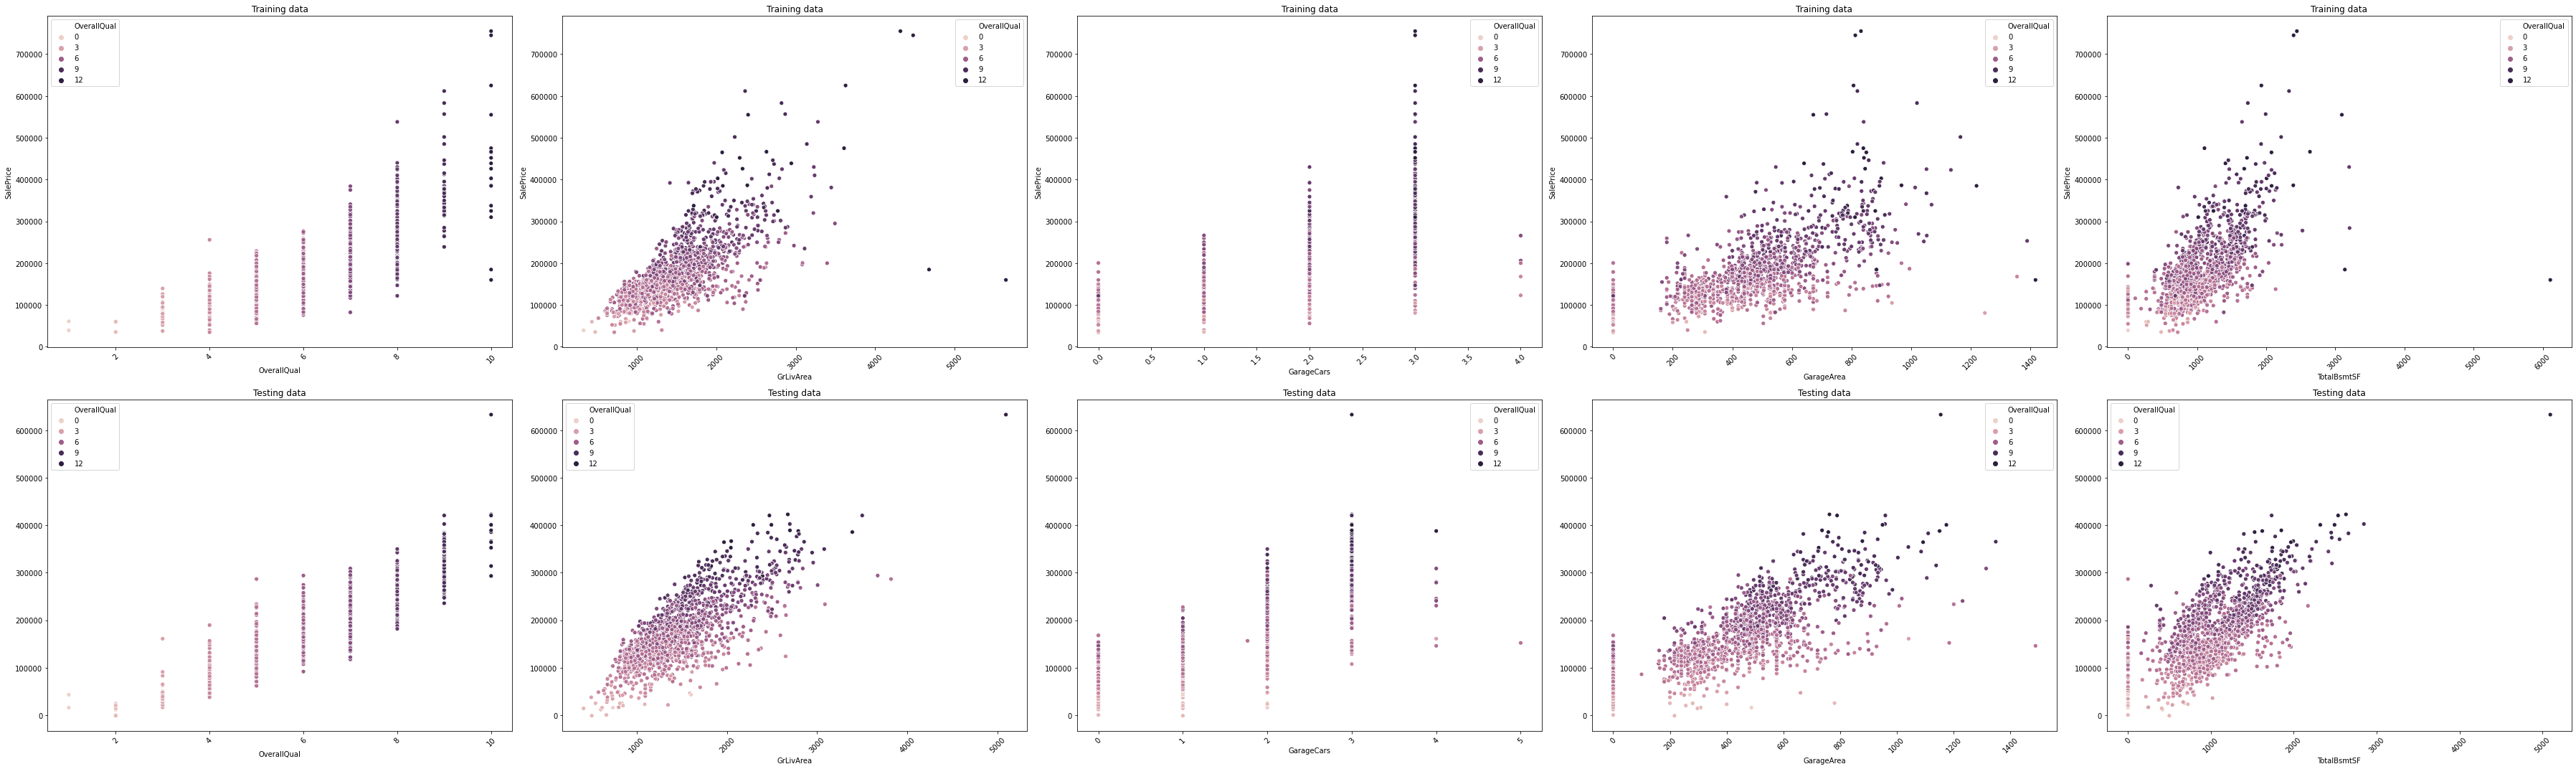

In [14]:
fig=plt.figure(figsize=(50,15))

ax=fig.add_subplot(2,5,1)
sns.scatterplot(x='OverallQual',y='SalePrice',data=train.drop(indexobj_train, axis = 1), hue = 'OverallQual')
plt.xticks(rotation = 45)
ax.set_title('Training data')

ax=fig.add_subplot(2,5,6)
sns.scatterplot(xtest.OverallQual,lasso_model.predict(xtest), xtest.OverallQual)
plt.xticks(rotation = 45)
ax.set_title('Testing data')


ax=fig.add_subplot(2,5,2)
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train.drop(indexobj_train, axis = 1), hue = 'OverallQual')
plt.xticks(rotation = 45)
ax.set_title('Training data')

ax=fig.add_subplot(2,5,7)
sns.scatterplot(xtest.GrLivArea,lasso_model.predict(xtest), xtest.OverallQual)
plt.xticks(rotation = 45)
ax.set_title('Testing data')

ax=fig.add_subplot(2,5,3)
sns.scatterplot(x='GarageCars',y='SalePrice',data=train.drop(indexobj_train, axis = 1), hue = 'OverallQual')
plt.xticks(rotation = 45)
ax.set_title('Training data')

ax=fig.add_subplot(2,5,8)
sns.scatterplot(xtest.GarageCars,lasso_model.predict(xtest), xtest.OverallQual)
plt.xticks(rotation = 45)
ax.set_title('Testing data')

ax=fig.add_subplot(2,5,4)
sns.scatterplot(x='GarageArea',y='SalePrice',data=train.drop(indexobj_train, axis = 1), hue = 'OverallQual')
plt.xticks(rotation = 45)
ax.set_title('Training data')

ax=fig.add_subplot(2,5,9)
sns.scatterplot(xtest.GarageArea,lasso_model.predict(xtest), xtest.OverallQual)
plt.xticks(rotation = 45)
ax.set_title('Testing data')

ax=fig.add_subplot(2,5,5)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train.drop(indexobj_train, axis = 1), hue = 'OverallQual')
plt.xticks(rotation = 45)
ax.set_title('Training data')

ax=fig.add_subplot(2,5,10)
sns.scatterplot(xtest.TotalBsmtSF,lasso_model.predict(xtest), xtest.OverallQual)
plt.xticks(rotation = 45)
ax.set_title('Testing data')
       
fig.tight_layout()  
plt.show()

We can see from the graphs, that the behavior of the Training and Testing Data are very similar using the most correlated features with 'SalePrice', so we can say that the model is acceptable, though clearly this can be improve.

***

### 2.2 Ridge Model.
We can do the same with a Ridge Regression.

In [15]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(xtrain, ytrain) 
ridge_model.coef_

array([[-1.07530503e+00, -1.81396503e+02, -5.67604408e+01,
         4.28457247e-01,  1.73008531e+04,  4.67939001e+03,
         2.71772256e+02,  1.35402912e+02,  3.13014352e+01,
         1.00115462e+01, -9.37950517e-01,  9.88467779e-02,
         9.17245023e+00,  1.82750852e+01,  1.82018199e+01,
        -5.69632734e+00,  3.07807947e+01,  9.33819964e+03,
         1.97801214e+03,  3.43805966e+03, -1.87174251e+03,
        -1.00664750e+04, -1.21954541e+04,  5.06851445e+03,
         3.95533248e+03,  1.22064338e+02,  1.12269626e+04,
        -4.09294413e+00,  2.38961207e+01, -2.88800188e+00,
         1.18244202e+01,  1.97840715e+01,  5.59920131e+01,
        -2.83660152e+01, -7.41000172e-01, -4.55495979e+01,
        -7.77150612e+02]])

In [16]:
ridge_model.predict(xtest)[:10].ravel()

array([115992.82460896, 151008.34503057, 172019.86429388, 198536.51451548,
       194959.25644792, 181129.71353576, 198654.11090033, 170992.18983225,
       206152.27330238, 112762.85878034])

***

### 2.3 Linear Model.

In [17]:
linear_model = LinearRegression(normalize=False)
linear_model.fit(xtrain,ytrain)
linear_model.coef_

array([[-1.07785480e+00, -1.81211272e+02, -5.65968157e+01,
         4.28298248e-01,  1.73002589e+04,  4.68037970e+03,
         2.71366790e+02,  1.34951177e+02,  3.12989302e+01,
         9.99872737e+00, -9.50428302e-01,  1.09472391e-01,
         9.15777146e+00,  1.82958074e+01,  1.81991400e+01,
        -5.73655882e+00,  3.07583885e+01,  9.37164719e+03,
         2.00546430e+03,  3.46052913e+03, -1.87254709e+03,
        -1.00809571e+04, -1.23330482e+04,  5.08212413e+03,
         3.94792949e+03,  1.22169048e+02,  1.12620760e+04,
        -4.20075971e+00,  2.38697532e+01, -2.91046901e+00,
         1.17879014e+01,  1.97476930e+01,  5.59647922e+01,
        -2.83357078e+01, -7.36376259e-01, -4.52259456e+01,
        -7.76397909e+02]])

In [18]:
linear_model.predict(xtest)[1:10].ravel()

array([151030.34249911, 171983.97743376, 198518.88320839, 194967.62194488,
       181130.49549801, 198666.26984727, 171002.94888791, 206145.09648223,
       112759.02095325])

**********

## 3. Comparing the results in different models

In [19]:
df=pd.DataFrame()
df['Features'] = xtrain.columns
df['Lasso Coefficients'] = lasso_model.coef_
df['Ridge Coefficients'] = ridge_model.coef_[0]
df['Linear Model Coefficients'] =linear_model.coef_[0]
df.sort_values(by=['Lasso Coefficients'],ascending=False,inplace = True)
df

,Features,Lasso Coefficients,Ridge Coefficients,Linear Model Coefficients
4,OverallQual,17301.018715,17300.853147,17300.258892
26,GarageCars,11257.896641,11226.962629,11262.075989
17,BsmtFullBath,9364.764265,9338.199637,9371.647190
23,TotRmsAbvGrd,5079.825337,5068.514446,5082.124129
5,OverallCond,4679.878150,4679.390007,4680.379700
24,Fireplaces,3947.460666,3955.332483,3947.929490
19,FullBath,3455.200202,3438.059662,3460.529132
18,BsmtHalfBath,1993.202646,1978.012143,2005.464300
6,YearBuilt,271.404903,271.772256,271.366790
7,YearRemodAdd,135.028844,135.402912,134.951177


In [22]:
submission = {
    'Id': test.Id.values,
    'Lasso Model': lasso_model.predict(xtest),
    'Ridge Model': ridge_model.predict(xtest).ravel(),
    'Linear Model': linear_model.predict(xtest).ravel()
}
solution = pd.DataFrame(submission)
solution.style.set_caption("Prediction of test data using different models")
solution.to_csv('solution.csv',index=False)
solution.head()

,Id,Lasso Model,Ridge Model,Linear Model
0,1461,115936.671147,115992.824609,115926.594601
1,1462,151035.006690,151008.345031,151030.342499
2,1463,171990.227666,172019.864294,171983.977434
3,1464,198522.528791,198536.514515,198518.883208
4,1465,194968.140791,194959.256448,194967.621945


Note that the predictions are very similar, despite the penalization term on the Lasso and Ridge models, so remains to check out what happens when the value of alpha changes.